# Loading the Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,Dropout,ActivityRegularization
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as preprocess_mobilenetv3
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers.legacy import Adam, Nadam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.regularizers import l1,l2
import numpy as np


op=[Adam,RMSprop]

# Loading the MNIST Dataset

In [2]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train[:50000], x_train[50000:]
y_train, y_test = y_train[:50000], y_train[50000:]

In [3]:
total_training_images = x_train.shape[0]
total_testing_images = x_test.shape[0]
print("Total training images",total_training_images,"Total testing images",total_testing_images)

Total training images 50000 Total testing images 10000


Train labels:  {0: 4932, 1: 5678, 2: 4968, 3: 5101, 4: 4859, 5: 4506, 6: 4951, 7: 5175, 8: 4842, 9: 4988}


Text(0.5, 1.0, 'Training Labels count')

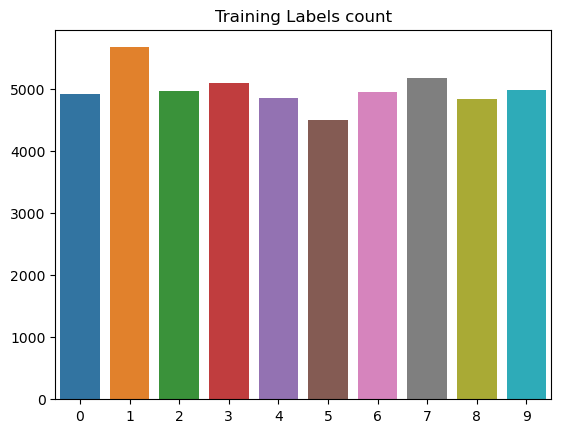

In [4]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))
sns.barplot(x = unique, y = counts).set_title("Training Labels count")


Test labels:  {0: 991, 1: 1064, 2: 990, 3: 1030, 4: 983, 5: 915, 6: 967, 7: 1090, 8: 1009, 9: 961}


Text(0.5, 1.0, 'Testing Labels count')

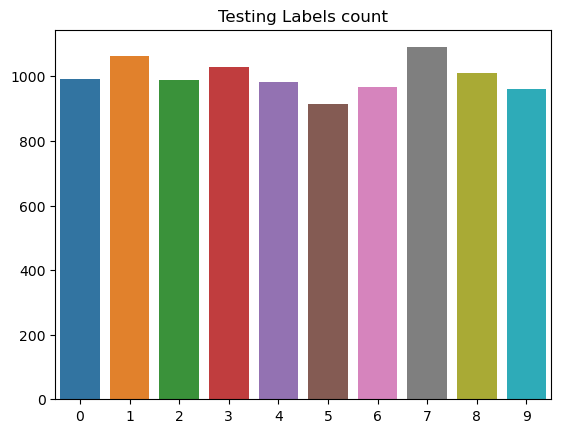

In [5]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

sns.barplot(x = unique, y = counts).set_title("Testing Labels count")

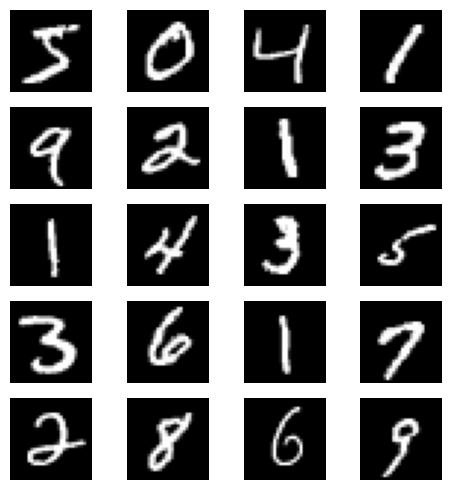

In [6]:
# Plotting the images
fig, axs = plt.subplots(5, 4, figsize=(5,5))
count = 0
for i in range(5):
    for j in range(4):
        axs[i,j].imshow(x_train[count], cmap='gray')
        axs[i,j].axis('off')  
        count+=1

plt.tight_layout()  
plt.show()

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [8]:
# Function to create and train a model
def train_model(model, optimizer, name):
    print(f"Training {name} model...")
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(optimizer,f'Test loss ({name}): {test_loss:.4f}, Test accuracy ({name}): {test_accuracy:.4f}')
    print()

    # Ploting the model accuracy and loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return history

# Create and Train customized CNN


Training Customized CNN Model model...
Epoch 1/5
782/782 [==============================] - 7s 9ms/step - loss: 0.2484 - accuracy: 0.9209 - val_loss: 0.0874 - val_accuracy: 0.9723
Epoch 2/5
782/782 [==============================] - 8s 11ms/step - loss: 0.1052 - accuracy: 0.9677 - val_loss: 0.0751 - val_accuracy: 0.9779
Epoch 3/5
782/782 [==============================] - 9s 11ms/step - loss: 0.0962 - accuracy: 0.9713 - val_loss: 0.0928 - val_accuracy: 0.9756
Epoch 4/5
782/782 [==============================] - 10s 12ms/step - loss: 0.0917 - accuracy: 0.9731 - val_loss: 0.0909 - val_accuracy: 0.9760
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0840 - accuracy: 0.9782
<keras.src.optimizers.legacy.adam.Adam object at 0x28f0c3850> Test loss (Customized CNN Model): 0.0840, Test accuracy (Customized CNN Model): 0.9782



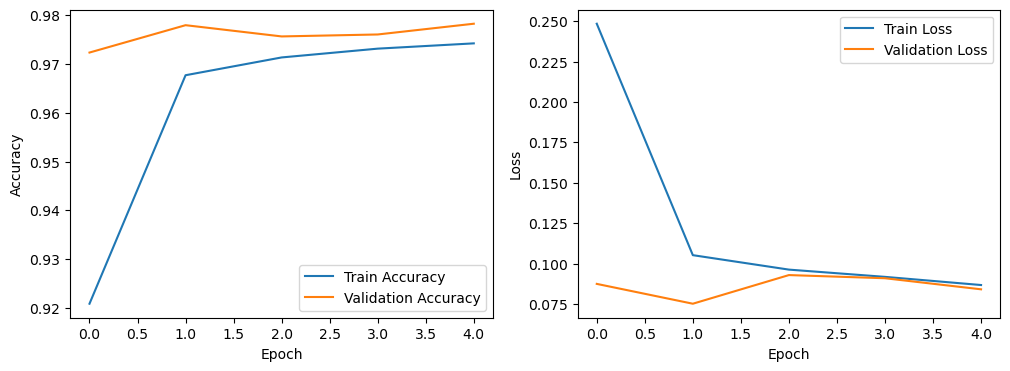

Training Customized CNN Model model...
Epoch 1/5
782/782 [==============================] - 9s 12ms/step - loss: 0.0930 - accuracy: 0.9780 - val_loss: 0.1143 - val_accuracy: 0.9787
Epoch 2/5
782/782 [==============================] - 8s 11ms/step - loss: 0.0996 - accuracy: 0.9774 - val_loss: 0.1105 - val_accuracy: 0.9753
Epoch 3/5
782/782 [==============================] - 8s 11ms/step - loss: 0.1073 - accuracy: 0.9754 - val_loss: 0.3226 - val_accuracy: 0.9492
Epoch 4/5
782/782 [==============================] - 8s 11ms/step - loss: 0.1155 - accuracy: 0.9745 - val_loss: 0.2775 - val_accuracy: 0.9588
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1297 - accuracy: 0.9726
<keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x28f0d5e90> Test loss (Customized CNN Model): 0.1297, Test accuracy (Customized CNN Model): 0.9726



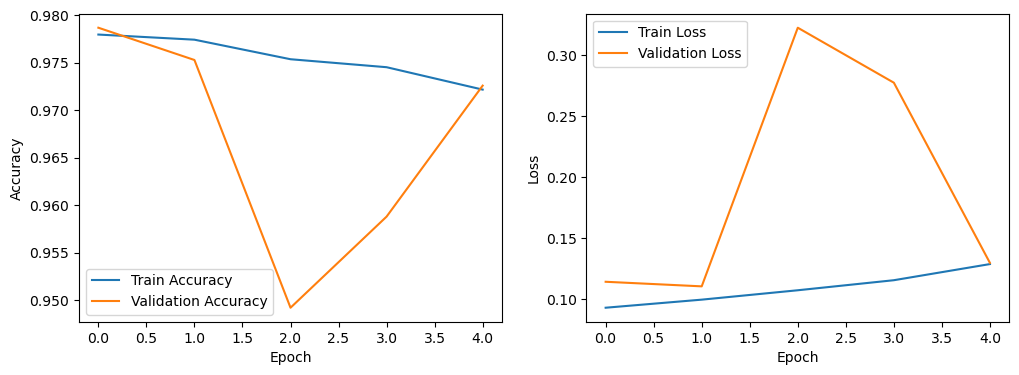

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
for i in op:
  train_model(model, i(learning_rate=0.01), "Customized CNN Model")


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [11]:
model.save('my_model_CNN.h5')

/Users/manjunathpopuri/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Create and Train customized CNN (L1 Regularization)

Training Customized CNN Model model...
Epoch 1/5
782/782 [==============================] - 9s 11ms/step - loss: 1.2209 - accuracy: 0.9059 - val_loss: 0.8597 - val_accuracy: 0.9481
Epoch 2/5
782/782 [==============================] - 9s 11ms/step - loss: 0.8430 - accuracy: 0.9526 - val_loss: 0.7902 - val_accuracy: 0.9627
Epoch 3/5
782/782 [==============================] - 9s 12ms/step - loss: 0.8120 - accuracy: 0.9559 - val_loss: 0.8092 - val_accuracy: 0.9608
Epoch 4/5
782/782 [==============================] - 9s 12ms/step - loss: 0.7886 - accuracy: 0.9600 - val_loss: 0.7659 - val_accuracy: 0.9663
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.7707 - accuracy: 0.9662
<keras.src.optimizers.legacy.adam.Adam object at 0x2d8131850> Test loss (Customized CNN Model): 0.7707, Test accuracy (Customized CNN Model): 0.9662



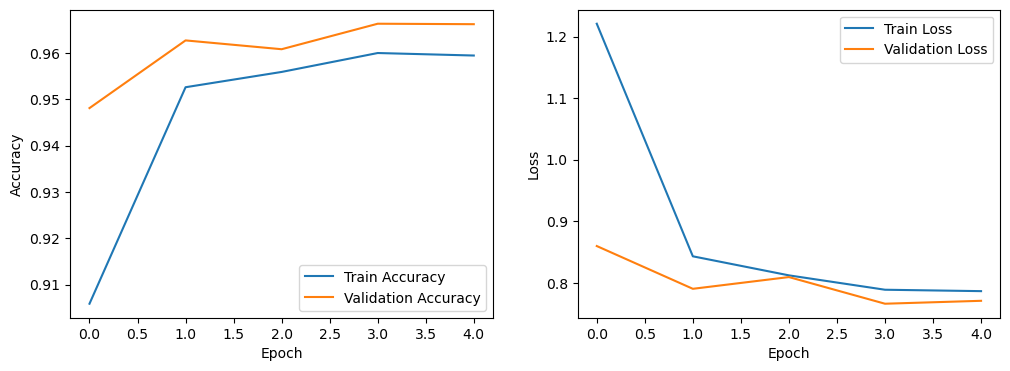

Training Customized CNN Model model...
Epoch 1/5
782/782 [==============================] - 8s 10ms/step - loss: 2.3779 - accuracy: 0.9521 - val_loss: 1.7448 - val_accuracy: 0.9125
Epoch 2/5
782/782 [==============================] - 7s 10ms/step - loss: 2.0889 - accuracy: 0.9542 - val_loss: 1.5815 - val_accuracy: 0.9688
Epoch 3/5
782/782 [==============================] - 8s 10ms/step - loss: 2.0806 - accuracy: 0.9552 - val_loss: 1.5828 - val_accuracy: 0.9657
Epoch 4/5
782/782 [==============================] - 8s 10ms/step - loss: 2.0713 - accuracy: 0.9557 - val_loss: 1.5692 - val_accuracy: 0.9691
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.5753 - accuracy: 0.9651
<keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x2d8186d50> Test loss (Customized CNN Model): 1.5753, Test accuracy (Customized CNN Model): 0.9651



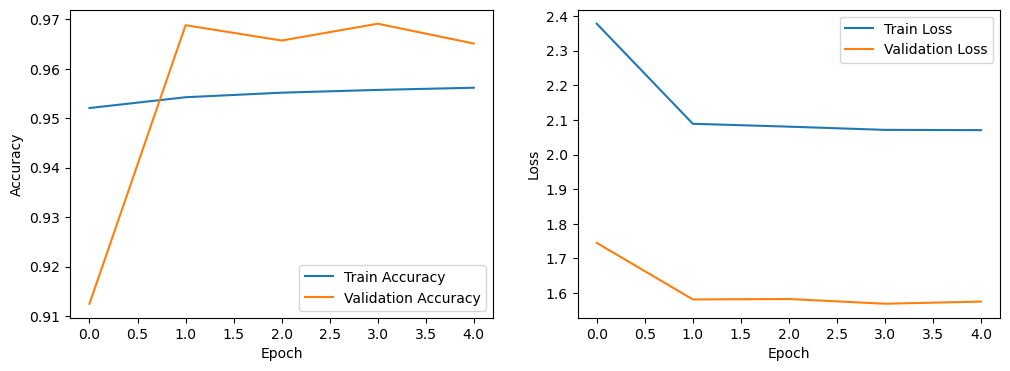

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l1(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1(0.001)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l1(0.001)),
    Dense(10, activation='softmax')
])
for i in op:
  train_model(model, i(learning_rate=0.01), "Customized CNN Model")

# Create and Train customized CNN (L2 Regularization)


Training Customized CNN Model model...
Epoch 1/5
782/782 [==============================] - 7s 9ms/step - loss: 0.7378 - accuracy: 0.8838 - val_loss: 0.4480 - val_accuracy: 0.9368
Epoch 2/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4438 - accuracy: 0.9321 - val_loss: 0.3600 - val_accuracy: 0.9504
Epoch 3/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4032 - accuracy: 0.9371 - val_loss: 0.3549 - val_accuracy: 0.9541
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.3787 - accuracy: 0.9399 - val_loss: 0.3915 - val_accuracy: 0.9332
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.9380
<keras.src.optimizers.legacy.adam.Adam object at 0x2d8196c50> Test loss (Customized CNN Model): 0.3705, Test accuracy (Customized CNN Model): 0.9380



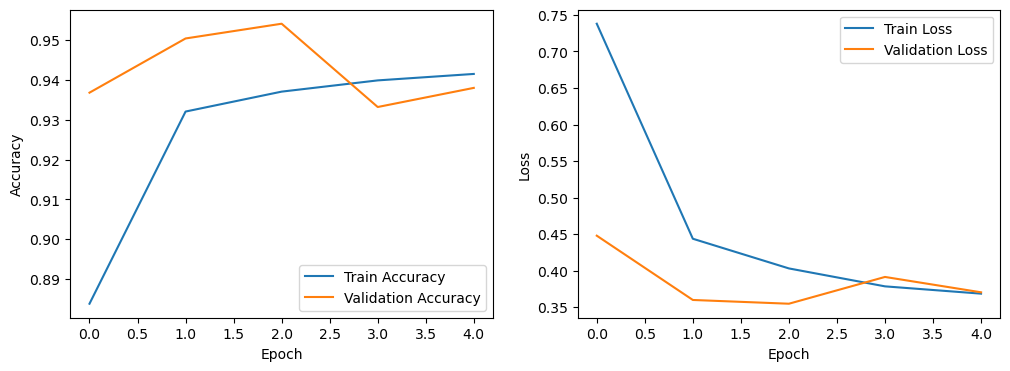

Training Customized CNN Model model...
Epoch 1/5
782/782 [==============================] - 8s 10ms/step - loss: 0.4892 - accuracy: 0.9205 - val_loss: 0.6721 - val_accuracy: 0.8588
Epoch 2/5
782/782 [==============================] - 8s 10ms/step - loss: 0.4352 - accuracy: 0.9270 - val_loss: 0.3836 - val_accuracy: 0.9460
Epoch 3/5
782/782 [==============================] - 8s 10ms/step - loss: 0.4230 - accuracy: 0.9305 - val_loss: 0.3535 - val_accuracy: 0.9539
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4219 - accuracy: 0.9311 - val_loss: 0.3259 - val_accuracy: 0.9616
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.7120 - accuracy: 0.8404
<keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x28fe9bc10> Test loss (Customized CNN Model): 0.7120, Test accuracy (Customized CNN Model): 0.8404



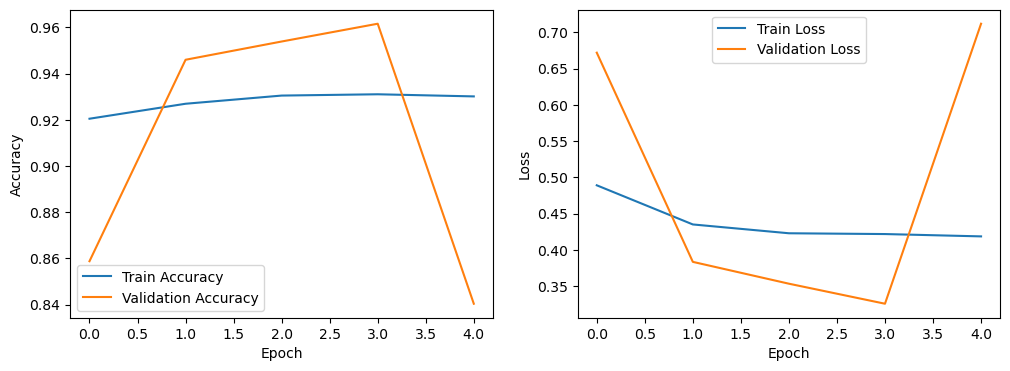

In [13]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])
for i in op:
  train_model(model, i(learning_rate=0.01), "Customized CNN Model")

# Create and Train customized CNN (Drop Regularization)


Training Customized CNN Model model...
Epoch 1/5
782/782 [==============================] - 7s 9ms/step - loss: 0.2447 - accuracy: 0.9269 - val_loss: 0.1489 - val_accuracy: 0.9566
Epoch 2/5
782/782 [==============================] - 7s 9ms/step - loss: 0.1379 - accuracy: 0.9613 - val_loss: 0.0859 - val_accuracy: 0.9768
Epoch 3/5
782/782 [==============================] - 7s 9ms/step - loss: 0.1294 - accuracy: 0.9655 - val_loss: 0.1054 - val_accuracy: 0.9724
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.1292 - accuracy: 0.9650 - val_loss: 0.0948 - val_accuracy: 0.9745
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0862 - accuracy: 0.9780
<keras.src.optimizers.legacy.adam.Adam object at 0x2e7248750> Test loss (Customized CNN Model): 0.0862, Test accuracy (Customized CNN Model): 0.9780



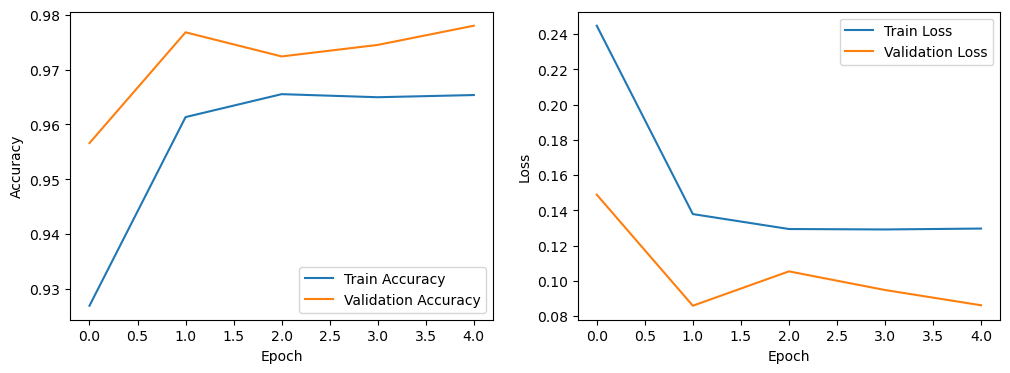

Training Customized CNN Model model...
Epoch 1/5
782/782 [==============================] - 8s 9ms/step - loss: 0.1367 - accuracy: 0.9703 - val_loss: 0.1219 - val_accuracy: 0.9766
Epoch 2/5
782/782 [==============================] - 7s 9ms/step - loss: 0.1752 - accuracy: 0.9650 - val_loss: 0.1093 - val_accuracy: 0.9780
Epoch 3/5
782/782 [==============================] - 8s 10ms/step - loss: 0.2023 - accuracy: 0.9596 - val_loss: 0.1549 - val_accuracy: 0.9650
Epoch 4/5
782/782 [==============================] - 8s 10ms/step - loss: 0.2483 - accuracy: 0.9523 - val_loss: 0.2612 - val_accuracy: 0.9702
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2725 - accuracy: 0.9712
<keras.src.optimizers.legacy.rmsprop.RMSprop object at 0x2da46be50> Test loss (Customized CNN Model): 0.2725, Test accuracy (Customized CNN Model): 0.9712



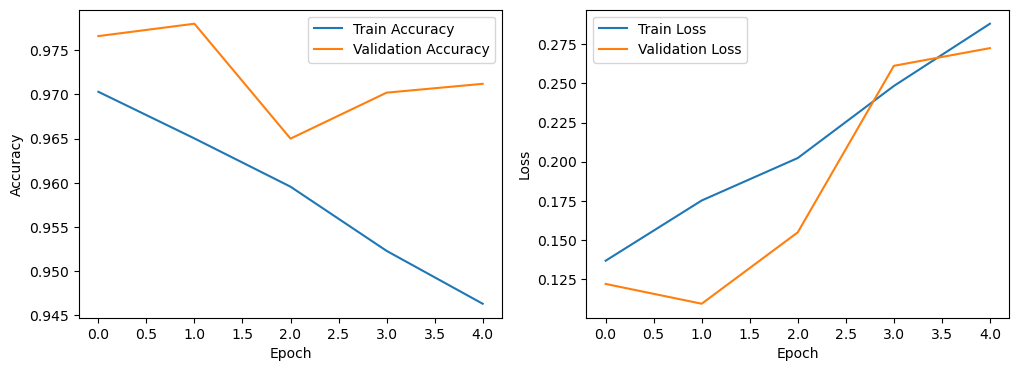

In [14]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Dropout layer with a dropout rate of 0.5
    Dense(10, activation='softmax')
])
for i in op:
  train_model(model, i(learning_rate=0.01), "Customized CNN Model")

# Task 2: Pre trained Models

In [36]:
train_images_resized = tf.image.resize(x_train, [32, 32])
test_images_resized = tf.image.resize(x_test, [32, 32])


train_images_rgb = tf.repeat(train_images_resized, 3, axis=-1)
test_images_rgb = tf.repeat(test_images_resized, 3, axis=-1)

# Mobilenetv3

In [37]:
def display(history, model, x_test,y_test, optimizer):
    test_loss, test_accuracy = model.evaluate(x_test, y_test)


    # Ploting the model accuracy and loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return history

In [39]:
base_model_mobilenetv3 = tf.keras.applications.MobileNetV3Small(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

# Fine-tuning the pretrained model
base_model_mobilenetv3.trainable = True
set_trainable = False
for layer in base_model_mobilenetv3.layers:
    if layer.name == 'top_conv': 
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model_mobilenetv3 = tf.keras.Sequential([
    base_model_mobilenetv3,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_mobilenetv3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_mobilenetv3.fit(train_images_rgb, y_train, epochs=50, validation_data=(test_images_rgb, y_test))

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0458 - accuracy: 0.3181 - val_loss: 1.8204 - val_accuracy: 0.4482
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7098 - accuracy: 0.4741 - val_loss: 1.6195 - val_accuracy: 0.4476
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5441 - accuracy: 0.5197 - val_loss: 1.4584 - val_accuracy: 0.5779
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4385 - accuracy: 0.5494 - val_loss: 1.3714 - val_accuracy: 0.6048
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3629 - accuracy: 0.5730 - val_loss: 1.3072 - val_accuracy: 0.6069
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3064 - accuracy: 0.5873 - val_loss: 1.2694 - val_accuracy: 0.5700
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2621 - accuracy: 0.5998 - val_loss: 1.2116 - val_accuracy:

313/313 [==============================] - 1s 4ms/step - loss: 0.7573 - accuracy: 0.7760


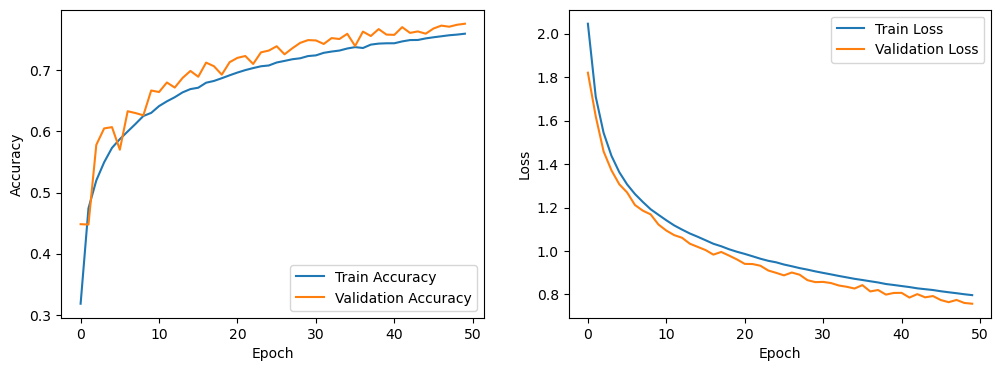

In [40]:
history = display(history, model_mobilenetv3, test_images_rgb, y_test, optimizer = "Adam")

In [41]:
model_mobilenetv3.save("my_model_mobilenetv3.h5")

# Resnet50

In [42]:
base_model_resnet50 = tf.keras.applications.ResNet50(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

# Fine-tuning the pretrained Resnet50 model
base_model_resnet50.trainable = True
set_trainable = False
for layer in base_model_resnet50.layers:
    if layer.name == 'conv5_block3_3_conv':  
        set_trainable = True
    layer.trainable = set_trainable

model_resnet50 = tf.keras.Sequential([
    base_model_resnet50,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')  
])

model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_resnet50.fit(train_images_rgb, y_train, epochs=5, validation_data=(test_images_rgb, y_test))


Epoch 1/5
1563/1563 [==============================] - 62s 39ms/step - loss: 0.3687 - accuracy: 0.8852 - val_loss: 0.9068 - val_accuracy: 0.7578
Epoch 2/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.2490 - accuracy: 0.9209 - val_loss: 0.4523 - val_accuracy: 0.8749
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.2161 - accuracy: 0.9318 - val_loss: 0.4437 - val_accuracy: 0.8666
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.1920 - accuracy: 0.9389 - val_loss: 0.4612 - val_accuracy: 0.8651
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.1750 - accuracy: 0.9435 - val_loss: 0.2940 - val_accuracy: 0.9108


313/313 [==============================] - 10s 32ms/step - loss: 0.2940 - accuracy: 0.9108


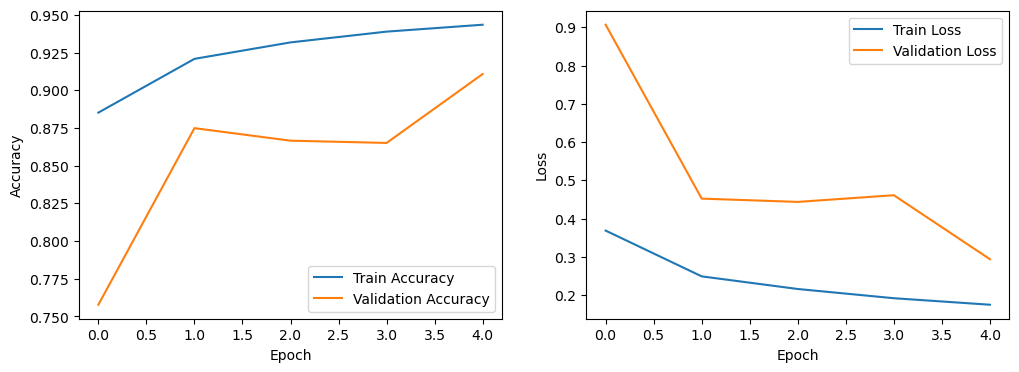

In [43]:
history = display(history, model_resnet50, test_images_rgb, y_test, optimizer = "Adam")

In [44]:
model_resnet50.save("my_model_resnet50.h5")

# VGG16

In [45]:
base_model_vgg16 = VGG16(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

# Fine-tuning the pretrained VGG16 model
base_model_vgg16.trainable = True
set_trainable = False
for layer in base_model_vgg16.layers:
    if layer.name == 'block5_conv3':  
        set_trainable = True
    layer.trainable = set_trainable

model_vgg16 = tf.keras.Sequential([
    base_model_vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  
])

model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_vgg16.fit(train_images_rgb, y_train, epochs=5, validation_data=(test_images_rgb, y_test))


Epoch 1/5
1563/1563 [==============================] - 111s 71ms/step - loss: 0.2290 - accuracy: 0.9270 - val_loss: 0.1053 - val_accuracy: 0.9672
Epoch 2/5
1563/1563 [==============================] - 109s 70ms/step - loss: 0.1139 - accuracy: 0.9658 - val_loss: 0.0808 - val_accuracy: 0.9742
Epoch 3/5
1563/1563 [==============================] - 109s 70ms/step - loss: 0.0944 - accuracy: 0.9709 - val_loss: 0.0804 - val_accuracy: 0.9764
Epoch 4/5
1563/1563 [==============================] - 109s 70ms/step - loss: 0.0824 - accuracy: 0.9749 - val_loss: 0.0696 - val_accuracy: 0.9792
Epoch 5/5
1563/1563 [==============================] - 107s 69ms/step - loss: 0.0748 - accuracy: 0.9776 - val_loss: 0.0631 - val_accuracy: 0.9814


313/313 [==============================] - 16s 51ms/step - loss: 0.0631 - accuracy: 0.9814


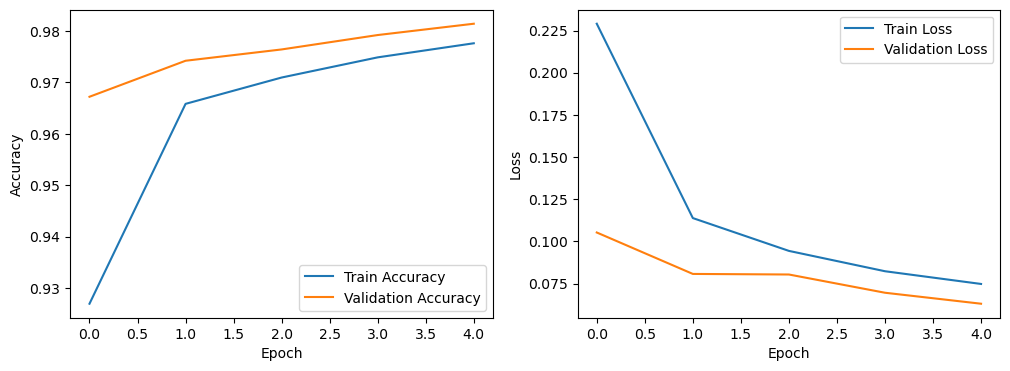

In [46]:
history = display(history, model_vgg16, test_images_rgb, y_test, optimizer = "Adam")

In [47]:
model_vgg16.save("my_model_vgg16.h5")

# Task 3: Recognize handwritten digits from a recorded video

In [48]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("my_model_CNN.h5")

threshold = 1.0

cap = cv2.VideoCapture("video.mp4")

while True:
    ret, frame = cap.read()

    if not ret:
        print("No available frames in the video.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        if cv2.contourArea(cnt) > 100:

            roi = thresh[y:y + h, x:x + w]
            roi = cv2.resize(roi, (28, 28))
            roi = np.expand_dims(roi, axis=0)
            roi = np.expand_dims(roi, axis=-1)
            roi = roi / 255.0

            prediction = model.predict(roi)
            predicted_class = np.argmax(prediction[0])
            probability = prediction[0][predicted_class]

            if probability >= threshold:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 5)
                cv2.putText(frame, str(predicted_class), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 5)

    cv2.imshow("Video with Detected Digits", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 7ms/step
